# Binary Classification
## Loading the dataset

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

# Capitalize the name
iris['feature_names'] = [name.capitalize() for name in iris['feature_names']]
iris['target_names'] = [name.capitalize() for name in iris['target_names']]

print('Data shape\t: {}'.format(iris['data'].shape))
print('Column name\t: {}'.format(iris['feature_names']))
print('Total class\t: {}'.format(len(iris['target_names'])))
print('Class name\t: {}'.format({i : iris['target_names'][i] for i in range(len(iris['target_names']))}))
print('Sample target\t: {}'.format(iris['target'][:5]))
print('Sample data\t: \n{}'.format(iris['data'][:5]))


Data shape	: (150, 4)
Column name	: ['Sepal length (cm)', 'Sepal width (cm)', 'Petal length (cm)', 'Petal width (cm)']
Total class	: 3
Class name	: {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
Sample target	: [0 0 0 0 0]
Sample data	: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## Data preparation

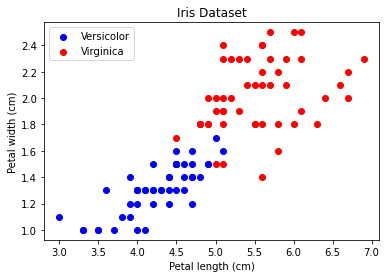

In [ ]:
import matplotlib.pyplot as plt

# Select only 'versicolor' and 'virginica' data
versicolor_virginica_mask = (iris['target'] != 0)
data = iris['data'][versicolor_virginica_mask]
target = iris['target'][versicolor_virginica_mask]

# Define colors for each target class
colors = {1: 'b', 2: 'r'} # versicolor = blue, virginica = red

# Create a scatter plot of the two features for each target class
fig, ax = plt.subplots()
for target_class in [1, 2]:
  mask = (target == target_class)
  ax.scatter(data[mask, 2], data[mask, 3], color=colors[target_class], label=iris['target_names'][target_class])

# Set the title, x-axis and y-axis labels
ax.set_title('Iris Dataset')
ax.set_xlabel(iris['feature_names'][2])
ax.set_ylabel(iris['feature_names'][3])

# Show the legend and the plot
ax.legend()
plt.show()


## Binary classification

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Split the data into 50% training set and 50% test set
data_length = len(data)

index = np.arange(data_length)
np.random.seed(2023)
np.random.shuffle(index)
train_index = index[:data_length//2]
test_index = index[data_length//2:]

# Train the model
classifier = LogisticRegression(random_state=2023)
classifier.fit(data[train_index], target[train_index])
prediction = classifier.predict(data[test_index])
print(prediction)

[2 1 2 2 2 1 2 2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 2 2 1 1 1 1 2 2 1 2 2 2 1 2
 1 2 1 1 2 2 1 2 2 2 2 1 2]


## Precision, recall, accuracy, and F1 score calculation

In [ ]:
from sklearn.metrics import classification_report

target_names = iris['target_names'][1:] # Select only 'Versicolor' and 'Virginica'
print(classification_report(target[test_index], prediction, target_names=target_names))

              precision    recall  f1-score   support

  Versicolor       0.95      0.95      0.95        20
   Virginica       0.97      0.97      0.97        30

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



# Exercise 3
## Reproduce the following figures

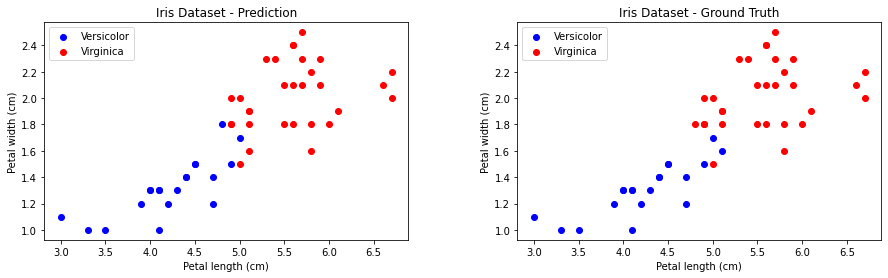

In [ ]:
# Define colors for each target class
colors = {1: 'b', 2: 'r'} # versicolor = blue, virginica = red

# Create a scatter plot of the two features for each target class
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

# Create ground truth data graph
t_data = data[test_index]
t_target = target[test_index]

for target_class in [1, 2]:
  mask = (t_target == target_class)
  ax2.scatter(t_data[mask, 2], t_data[mask, 3], color=colors[target_class], label=iris['target_names'][target_class])

# Set the title, x-axis and y-axis labels
ax2.set_title('Iris Dataset - Ground Truth')
ax2.set_xlabel(iris['feature_names'][2])
ax2.set_ylabel(iris['feature_names'][3])

# add the legend of ground truth
ax2.legend()


# Create prediction data graph
p_data = data[test_index]
p_target = prediction

# Create a scatter plot of the two features for each target class
for target_class in [1, 2]:
  mask = (p_target == target_class)
  ax1.scatter(p_data[mask, 2], p_data[mask, 3], color=colors[target_class], label=iris['target_names'][target_class])

# Set the title, x-axis and y-axis labels
ax1.set_title('Iris Dataset - Prediction')
ax1.set_xlabel(iris['feature_names'][2])
ax1.set_ylabel(iris['feature_names'][3])

# Show the legend and the plot
ax1.legend()
plt.subplots_adjust(wspace=0.3)
plt.show()


# 😎